<a href="https://colab.research.google.com/github/KhushiAgg/Resort_Reviews/blob/main/Resort_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Find 5 interesting insights from the data http://bit.ly/2Nm6L1d

In [ ]:
#importing important libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re

import itertools
import collections
import io

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Data Analyst - Test Data - US.csv to Data Analyst - Test Data - US (4).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Data Analyst - Test Data - US.csv']))
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [ ]:
df.shape

(6448, 3)

In [ ]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

In [ ]:
#Location column has lots of missing data so We'll drop it 
df1 = df.drop(columns = ["Location"])
df1.head()

,Review,date
0,I was very impressed with the resort.\n Great ...,2019/08/20
1,The rooms were nice the outside needs work als...,2019/08/20
2,Great location! I have stayed at this hotel on...,2019/08/20
3,The hotel was adequate for my stay. The strips...,2019/08/20
4,"Great location, room was large and spacious. P...",2019/08/19


In [ ]:
df2 = df1.dropna()
df2.isnull().sum()

Review    0
date      0
dtype: int64

In [ ]:
df2.date.unique()

array(['2019/08/20', '2019/08/19', '2019/08/18', '2019/08/17',
       '2019/08/16', '2019/08/15', '2019/08/14', '2019/08/13',
       '2019/08/12', '2019/08/11', '2019/08/10', '2019/08/09',
       '2019/08/08', '2019/08/07', '2019/08/06', '2019/08/05',
       '2019/08/04', '2019/08/03', '2019/08/02', '2019/08/01',
       '2019/07/31', '2019/07/30', '2019/07/29', '2019/07/28',
       '2019/07/27', '2019/07/26', '2019/07/25', '2019/07/24',
       '2019/07/23', '2019/07/22', '2019/07/21', '2019/07/20',
       '2019/07/19', '2019/07/18', '2019/07/17', '2019/07/16',
       '2019/07/15', '2019/07/14', '2019/07/13', '2019/07/12',
       '2019/07/11', '2019/07/10', '2019/07/09', '2019/07/08',
       '2019/07/07', '2019/07/06', '2019/07/05', '2019/07/04',
       '2019/07/03', '2019/07/02', '2019/07/01', '2019/06/30',
       '2019/06/29', '2019/06/28', '2019/06/27', '2019/06/26',
       '2019/06/25', '2019/06/24', '2019/06/23', '2019/06/22',
       '2019/06/21', '2019/06/20', '2019/06/19', '2019/

In [ ]:
def urlify(s):
  s = re.sub(r"/", '-', s)
  return s

In [ ]:
df2['date'] = df2['date'].apply(urlify)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.date.unique()

array(['2019-08-20', '2019-08-19', '2019-08-18', '2019-08-17',
       '2019-08-16', '2019-08-15', '2019-08-14', '2019-08-13',
       '2019-08-12', '2019-08-11', '2019-08-10', '2019-08-09',
       '2019-08-08', '2019-08-07', '2019-08-06', '2019-08-05',
       '2019-08-04', '2019-08-03', '2019-08-02', '2019-08-01',
       '2019-07-31', '2019-07-30', '2019-07-29', '2019-07-28',
       '2019-07-27', '2019-07-26', '2019-07-25', '2019-07-24',
       '2019-07-23', '2019-07-22', '2019-07-21', '2019-07-20',
       '2019-07-19', '2019-07-18', '2019-07-17', '2019-07-16',
       '2019-07-15', '2019-07-14', '2019-07-13', '2019-07-12',
       '2019-07-11', '2019-07-10', '2019-07-09', '2019-07-08',
       '2019-07-07', '2019-07-06', '2019-07-05', '2019-07-04',
       '2019-07-03', '2019-07-02', '2019-07-01', '2019-06-30',
       '2019-06-29', '2019-06-28', '2019-06-27', '2019-06-26',
       '2019-06-25', '2019-06-24', '2019-06-23', '2019-06-22',
       '2019-06-21', '2019-06-20', '2019-06-19', '2019-

In [ ]:
from datetime import datetime

def str_to_date(date_string):
  try:
    date_obj = datetime.fromisoformat(date_string)
    return date_obj
  except:
    pass
  

In [ ]:
df2['date'] = df2['date'].apply(str_to_date)

df2.sample(n=5, random_state=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Review,date
1214,Room and beds were small but clean. Bathroom w...,2019-04-29
5772,"When I first checked in, I was told that there...",NaT
4550,"The room was great, and the house keeping staf...",2018-10-02
2836,The property provided a shower in the lobby ba...,NaT
4481,Older bathroom could use some scrubbing on the...,2018-10-07


In [ ]:
df2.date.unique()

array(['2019-08-20T00:00:00.000000000', '2019-08-19T00:00:00.000000000',
       '2019-08-18T00:00:00.000000000', '2019-08-17T00:00:00.000000000',
       '2019-08-16T00:00:00.000000000', '2019-08-15T00:00:00.000000000',
       '2019-08-14T00:00:00.000000000', '2019-08-13T00:00:00.000000000',
       '2019-08-12T00:00:00.000000000', '2019-08-11T00:00:00.000000000',
       '2019-08-10T00:00:00.000000000', '2019-08-09T00:00:00.000000000',
       '2019-08-08T00:00:00.000000000', '2019-08-07T00:00:00.000000000',
       '2019-08-06T00:00:00.000000000', '2019-08-05T00:00:00.000000000',
       '2019-08-04T00:00:00.000000000', '2019-08-03T00:00:00.000000000',
       '2019-08-02T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-07-31T00:00:00.000000000', '2019-07-30T00:00:00.000000000',
       '2019-07-29T00:00:00.000000000', '2019-07-28T00:00:00.000000000',
       '2019-07-27T00:00:00.000000000', '2019-07-26T00:00:00.000000000',
       '2019-07-25T00:00:00.000000000', '2019-07-24

In [ ]:
df3 = df2.dropna()
df3[df3.date == 'NaT'].head()

,Review,date


In [ ]:
 # Python library for NLP
import nltk
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

# download the stopwords for the process_tweet function
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Function to preprocess reviews
def process_review(review):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    review = re.sub(r'\$\w*', '', review)
    review = re.sub(r'^RT[\s]+', '', review)
    review = re.sub(r'https?:\/\/.*[\r\n]*', '', review)
    review = re.sub(r'#', '', review)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    review_tokens = tokenizer.tokenize(review)

    review_clean = []
    for word in review_tokens:
        if (word not in stopwords_english and  
                word not in string.punctuation): 
            stem_word = stemmer.stem(word)  # stemming word
            review_clean.append(stem_word)
    listToStr = ' '.join(map(str, review_clean))

    return listToStr

In [ ]:
#CLeaning the text
df3['Review'] = df3['Review'].apply(process_review)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3.sample(n=5, random_state=1)

,Review,date
5323,fiancé book hotel anniversari locat arriv tack...,2018-08-06
5384,reopen pub food massiv menu well.lov place goo...,2018-12-01
4854,staff friendli accommod suggest appreci read r...,2018-09-09
4577,great place stay everi time fli sjc read read ...,2018-09-30
4784,great place stay nice read read less,2018-09-13


In [ ]:
df3.shape

(5068, 2)

In [ ]:
#To get the subjectivity in the text
#Subjective sentence expresses some personal feelings, views, or beliefs. 

def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#To get the polarity in the text
#Polarity simply means emotions expressed in a sentence.
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create new columns 
df3['Subjectivity'] = df3['Review'].apply(getsubjectivity)
df3['Polarity'] = df3['Review'].apply(getPolarity)

df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Review,date,Subjectivity,Polarity
0,impress resort great staff main resort pool ba...,2019-08-20,0.520000,0.393333
1,room nice outsid need work also free breakfast...,2019-08-20,0.673333,0.386667
2,great locat stay hotel last three trip new yor...,2019-08-20,0.334470,0.192424
3,hotel adequ stay strip bathtub useless fell ta...,2019-08-20,0.493333,0.046667
4,great locat room larg spaciou park easi apprec...,2019-08-19,0.408333,0.316667


## 1) Word Cloud of reviews

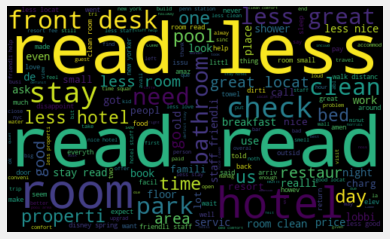

In [ ]:
#Plotting the Word Cloud
allWords = ' '.join( [twts for twts in df3['Review']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Let's compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df3['Analysis'] = df3['Polarity'].apply(getAnalysis)

df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Review,date,Subjectivity,Polarity,Analysis
0,impress resort great staff main resort pool ba...,2019-08-20,0.520000,0.393333,Positive
1,room nice outsid need work also free breakfast...,2019-08-20,0.673333,0.386667,Positive
2,great locat stay hotel last three trip new yor...,2019-08-20,0.334470,0.192424,Positive
3,hotel adequ stay strip bathtub useless fell ta...,2019-08-20,0.493333,0.046667,Positive
4,great locat room larg spaciou park easi apprec...,2019-08-19,0.408333,0.316667,Positive
...,...,...,...,...,...
6443,· staff friendli frank chef buffet bar top mee...,2019-07-12,0.552381,0.314935,Positive
6444,· internet bare work work,2019-07-12,0.100000,0.050000,Positive
6445,· locat great · bed uncomfort bed ever,2019-07-10,0.750000,0.800000,Positive
6446,· earli check staff accommod abl check sever h...,2019-07-10,0.000000,0.000000,Neutral


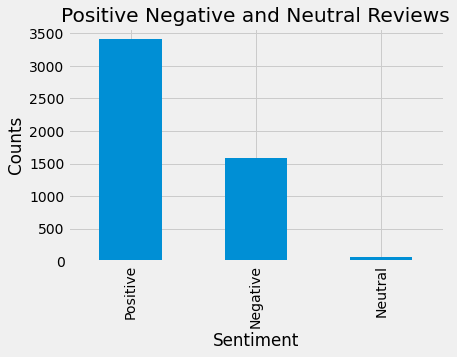

In [ ]:
#Plotting the value counts

df3['Analysis'].value_counts()

#plot and visualize the counts
plt.title("Positive Negative and Neutral Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df3['Analysis'].value_counts().plot(kind='bar')
plt.show()

## 2) Percentage of Positive, Negative and Neutral Reviews


In [ ]:
# Get the percentage of positive reviews
previews = df3[df3.Analysis == 'Positive']
previews = previews['Review']

print("Percentage of positive reviews: " , round((previews.shape[0] / df3.shape[0]) * 100, 1), "%" )

Percentage of positive reviews:  67.3 %


In [ ]:
# Get the percentage of positive reviews
previews = df3[df3.Analysis == 'Negative']
previews = previews['Review']

print("Percentage of negative reviews: " , round((previews.shape[0] / df3.shape[0]) * 100, 1), "%" )

Percentage of negative reviews:  31.4 %


In [ ]:
# Get the percentage of positive reviews
previews = df3[df3.Analysis == 'Neutral']
previews = previews['Review']

print("Percentage of neutral reviews: " , round((previews.shape[0] / df3.shape[0]) * 100, 1), "%" )

Percentage of neutral reviews:  1.3 %


## 3) Plotting Number of reviews over time

In [ ]:
# Using graph_objects
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(x=df['date'], y=df['date'].value_counts())])
fig.show()

## 4) Frequency of words

In [ ]:
# List of all words across reviews
all_words = list(itertools.chain(*[df3.Review]))

# Create counter
counts = collections.Counter(all_words)

counts.most_common(15)

[('amaz read read less', 8),
 ('good read read less', 8),
 ('great read read less', 7),
 ('nice read read less', 4),
 ('great locat read read less', 3),
 ('perfect read read less', 3),
 ('good servic read read less', 2),
 ('great experi read read less', 2),
 ('love hotel read read less', 2),
 ('awesom read read less', 2),
 ('great hotel read read less', 2),
 ('excel read read less', 2),
 ('nice hotel read read less', 2),
 ('nice place read read less', 2),
 ('good experi read read less', 2)]

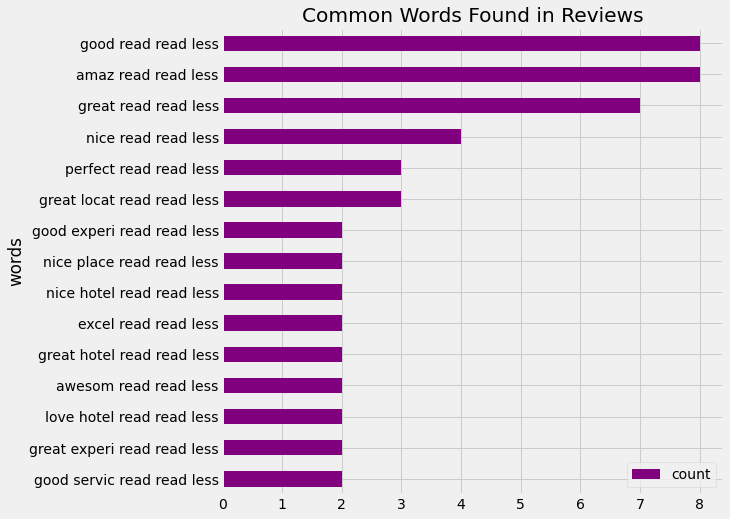

In [ ]:
frequency_reviews = pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
frequency_reviews.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Reviews")

plt.show()

## 5) Plotting polarity and subjectivity

In [ ]:
df3.columns = df3.columns.map(str)

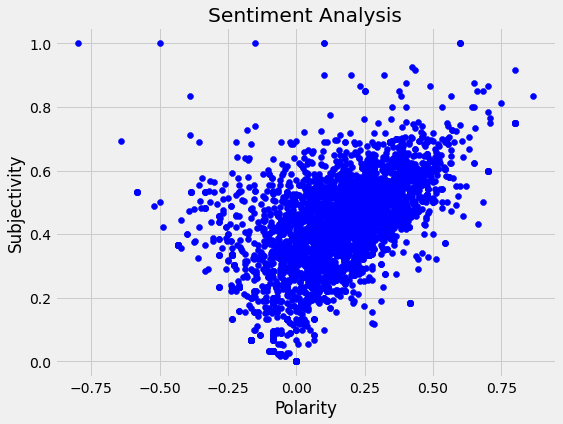

In [ ]:
#Plotting polarity and subjectivity
plt.figure(figsize=(8,6))
plt.scatter(df3['Polarity'], df3['Subjectivity'], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()